In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
n = 100_000
rng = np.random.default_rng(42)

dados = {
    "valor_parcela": rng.integers(200, 2000, n),
    "possui_garantia": rng.integers(0, 2, n),
    "score_credito_baixo": rng.integers(0, 2, n),
    "idade": rng.integers(18, 70, n),
    "renda_mensal": rng.normal(4000, 1500, n).astype(int),
    "tempo_emprego_anos": rng.integers(0, 30, n),
    "possui_dividas": rng.integers(0, 2, n),
    "evento_inadimplencia": rng.choice([0, 1], size=n, p=[0.7, 0.3])
}

df = pd.DataFrame(dados)

In [17]:
X = df[["valor_parcela", "possui_garantia", "score_credito_baixo",
        "idade", "renda_mensal", "tempo_emprego_anos", "possui_dividas"]]
y = df["evento_inadimplencia"]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Normalização feita. Matriz X tem formato:", X_scaled.shape)
print("Primeiras 3 linhas da matriz:")
print(X_scaled[:3])

Normalização feita. Matriz X tem formato: (100000, 7)
Primeiras 3 linhas da matriz:
[[-1.42290282  0.99688485  1.0044499  -0.42960012  0.28995133  0.28640709
   1.00028004]
 [ 0.95038236  0.99688485  1.0044499   1.1676614   0.17758451 -0.05952165
  -0.99972004]
 [ 0.53654917  0.99688485  1.0044499   1.23421396 -0.62771102 -1.67385576
   1.00028004]]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print("\nTreino:", X_train.shape[0], " | Teste:", X_test.shape[0])



Treino: 75000  | Teste: 25000


In [21]:
modelo = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [22]:
y_pred = modelo.predict(X_test)

print("\n--- Avaliação ---")
print("Acurácia:", round(accuracy_score(y_test, y_pred), 4))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))


--- Avaliação ---
Acurácia: 0.685

Matriz de confusão:
 [[16758   768]
 [ 7107   367]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81     17526
           1       0.32      0.05      0.09      7474

    accuracy                           0.69     25000
   macro avg       0.51      0.50      0.45     25000
weighted avg       0.59      0.69      0.59     25000



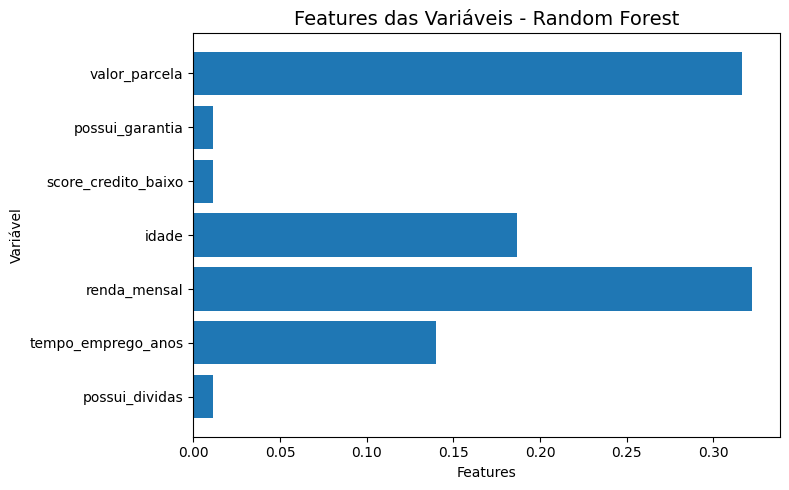

In [24]:
importancias = modelo.feature_importances_
nomes = X.columns

plt.figure(figsize=(8, 5))
plt.barh(nomes, importancias)
plt.title("Features das Variáveis - Random Forest", fontsize=14)
plt.xlabel("Features")
plt.ylabel("Variável")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()